<a href="https://colab.research.google.com/github/jiin124/Goyang_house_price_predict_BAproject/blob/main/%EA%B3%A0%EC%96%91%EC%8B%9C%EC%A7%91%EA%B0%92%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (40.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155455 files and di

In [ ]:
#한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager,rc

font_path="/content/drive/MyDrive/NanumSquareB.ttf"
font=font_manager.FontProperties(fname=font_path)

In [ ]:
plt.rc('font',family='NanumBarunGothic')

In [ ]:
df=pd.read_csv('/content/고양시집.csv',encoding='cp949')

In [ ]:
df.head()

,도,구,동,전용면적(㎡),계약년,계약월,건축년도,도로명,시군구 코드,거래금액(만원)
0,경기도,고양덕양구,고양동,84.93,2021,3,2007.0,읍내로 25,4128111600,"27,000"
1,경기도,고양덕양구,고양동,59.99,2021,3,2007.0,읍내로 25,4128111600,"26,500"
2,경기도,고양덕양구,고양동,84.93,2021,3,2007.0,읍내로 25,4128111600,"29,700"
3,경기도,고양덕양구,고양동,59.99,2021,4,2007.0,읍내로 25,4128111600,"26,900"
4,경기도,고양덕양구,고양동,84.93,2021,4,2007.0,읍내로 25,4128111600,"28,000"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12386 entries, 0 to 12385
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   도         12386 non-null  object 
 1   구         12386 non-null  object 
 2   동         12386 non-null  object 
 3   전용면적(㎡)   12386 non-null  float64
 4   계약년       12386 non-null  int64  
 5   계약월       12386 non-null  int64  
 6   건축년도      12384 non-null  float64
 7   도로명       12384 non-null  object 
 8   시군구 코드    12386 non-null  int64  
 9   거래금액(만원)  12386 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 967.8+ KB


In [ ]:
df.isna().sum()

도           0
구           0
동           0
전용면적(㎡)     0
계약년         0
계약월         0
건축년도        2
도로명         2
시군구 코드      0
거래금액(만원)    0
dtype: int64

In [ ]:
df=df.fillna(0)

In [ ]:
df['건축년도']=df['건축년도'].astype('int')

In [ ]:
import re

In [ ]:
for i in range(len(df)):
  df['거래금액(만원)'][i]=re.sub("\!|\,|\?","",str(df['거래금액(만원)'][i]))


In [ ]:
df.head()

,도,구,동,전용면적(㎡),계약년,계약월,건축년도,도로명,시군구 코드,거래금액(만원)
0,경기도,고양덕양구,고양동,84.93,2021,3,2007,읍내로 25,4128111600,27000
1,경기도,고양덕양구,고양동,59.99,2021,3,2007,읍내로 25,4128111600,26500
2,경기도,고양덕양구,고양동,84.93,2021,3,2007,읍내로 25,4128111600,29700
3,경기도,고양덕양구,고양동,59.99,2021,4,2007,읍내로 25,4128111600,26900
4,경기도,고양덕양구,고양동,84.93,2021,4,2007,읍내로 25,4128111600,28000


In [ ]:
df['거래금액(만원)']=df['거래금액(만원)'].astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12386 entries, 0 to 12385
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   도         12386 non-null  object 
 1   구         12386 non-null  object 
 2   동         12386 non-null  object 
 3   전용면적(㎡)   12386 non-null  float64
 4   계약년       12386 non-null  int64  
 5   계약월       12386 non-null  int64  
 6   건축년도      12386 non-null  int64  
 7   도로명       12386 non-null  object 
 8   시군구 코드    12386 non-null  int64  
 9   거래금액(만원)  12386 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 967.8+ KB


In [ ]:
df.to_csv('집값전처리.csv')

# EDA

In [ ]:
df.columns

Index(['도', '구', '동', '전용면적(㎡)', '계약년', '계약월', '건축년도', '도로명', '시군구 코드',
       '거래금액(만원)'],
      dtype='object')

In [ ]:
df['구'].value_counts()

고양덕양구     4969
고양일산서구    4387
고양일산동구    3030
Name: 구, dtype: int64

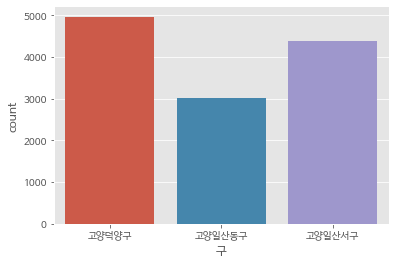

In [ ]:
sns.countplot(data=df,x='구')

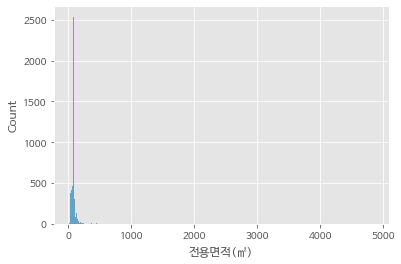

In [ ]:
sns.histplot(data=df,x='전용면적(㎡)')

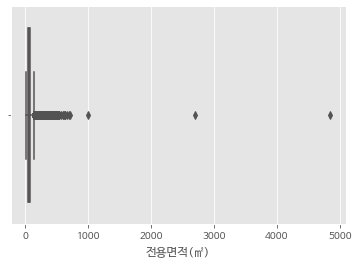

In [ ]:
sns.boxplot(data=df,x='전용면적(㎡)')

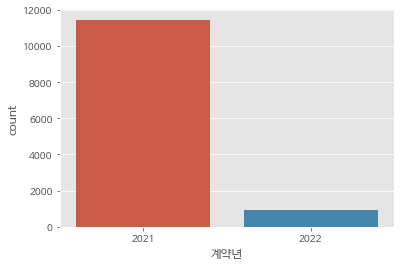

In [ ]:
sns.countplot(data=df,x='계약년')

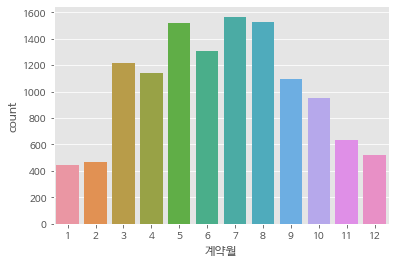

In [ ]:
sns.countplot(data=df,x='계약월')

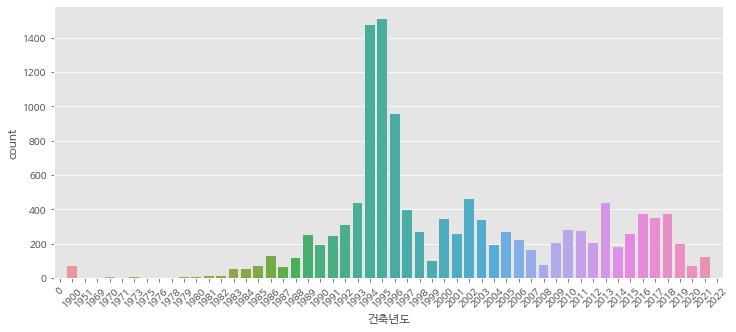

In [ ]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=45)
sns.countplot(data=df,x='건축년도')

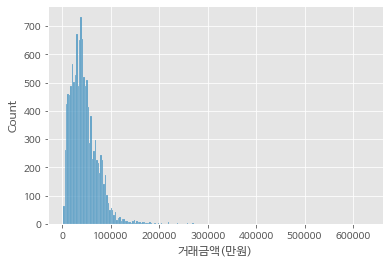

In [ ]:
sns.histplot(data=df,x='거래금액(만원)')

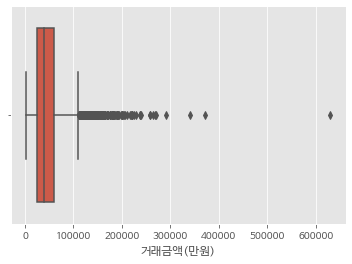

In [ ]:
sns.boxplot(data=df,x='거래금액(만원)')

In [ ]:
df['동'].value_counts()

일산동     1299
행신동     1198
탄현동     1007
주엽동      823
중산동      620
화정동      611
풍동       511
덕이동      507
대화동      476
관산동      452
백석동      435
고양동      431
내유동      382
마두동      378
주교동      373
식사동      338
성사동      331
토당동      290
가좌동      254
성석동      192
사리현동     182
도내동      164
장항동      157
정발산동     122
신원동      120
동산동      107
삼송동      105
원흥동       74
향동동       56
벽제동       51
문봉동       49
오금동       42
대장동       40
설문동       40
지축동       34
대자동       29
화전동       18
덕은동       15
구산동       13
현천동       11
용두동       10
행주내동       8
법곳동        8
행주외동       7
지영동        4
내곡동        3
효자동        2
강매동        2
선유동        2
산황동        2
원당동        1
Name: 동, dtype: int64

# 학원 데이터 추가

In [ ]:
li={'가좌동': 62,
 '강매동': 1,
 '고양동': 61,
 '관산동': 30,
 '내유동': 22,
 '대자동': 7,
 '대장동': 2,
 '대화동': 161,
 '덕은동': 2,
 '덕이동': 61,
 '도내동': 52,
 '동산동': 44,
 '마두동': 203,
 '문봉동': 2,
 '백석동': 95,
 '법곳동': 1,
 '벽제동': 3,
 '사리현동': 6,
 '산황동': 1,
 '삼송동': 31,
 '설문동': 2,
 '성사동': 112,
 '성석동': 14,
 '식사동': 82,
 '신원동': 37,
 '오금동': 1,
 '용두동': 1,
 '원흥동': 41,
 '일산동': 443,
 '장항동': 116,
 '정발산동': 65,
 '주교동': 31,
 '주엽동': 250,
 '중산동': 149,
 '지영동': 1,
 '지축동': 13,
 '탄현동': 150,
 '토당동': 58,
 '풍동': 85,
 '행신동': 240,
 '행주내동': 1,
 '향동동': 51,
 '현천동': 2,
 '화전동': 4,
 '화정동': 259}

In [ ]:
df['학원개수']=df['동'].map(li)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12386 entries, 0 to 12385
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   도         12386 non-null  object 
 1   구         12386 non-null  object 
 2   동         12386 non-null  object 
 3   전용면적(㎡)   12386 non-null  float64
 4   계약년       12386 non-null  int64  
 5   계약월       12386 non-null  int64  
 6   건축년도      12386 non-null  int64  
 7   도로명       12386 non-null  object 
 8   시군구 코드    12386 non-null  int64  
 9   거래금액(만원)  12386 non-null  int64  
 10  학원개수      12358 non-null  float64
dtypes: float64(2), int64(5), object(4)
memory usage: 1.0+ MB


## 대형마트 데이터 추가

In [ ]:
mart={'가좌동': 2,
 '내유동': 1,
 '대화동': 10,
 '덕이동': 8,
 '도내동': 4,
 '동산동': 3,
 '마두동': 3,
 '문봉동': 1,
 '백석동': 4,
 '사리현동': 2,
 '삼송동': 1,
 '성사동': 1,
 '성석동': 3,
 '식사동': 6,
 '원당동': 1,
 '원흥동': 1,
 '일산동': 5,
 '장항동': 9,
 '정발산동': 2,
 '주엽동': 4,
 '중산동': 1,
 '지축동': 2,
 '탄현동': 1,
 '토당동': 4,
 '풍동': 4,
 '행신동': 7,
 '향동동': 4,
 '화전동': 1,
 '화정동': 7}

In [ ]:
df['대형마트 개수']=df['동'].map(mart)

In [ ]:
df.tail()

,도,구,동,전용면적(㎡),계약년,계약월,건축년도,도로명,시군구 코드,거래금액(만원),학원개수,대형마트 개수
12381,경기도,고양일산서구,탄현동,425.06,2021,3,1999,현중로26번길,4128710300,83800,150.0,1.0
12382,경기도,고양일산서구,탄현동,253.61,2021,6,1996,현중로26번길,4128710300,70000,150.0,1.0
12383,경기도,고양일산서구,탄현동,206.64,2021,5,1998,현중로26번길,4128710300,55000,150.0,1.0
12384,경기도,고양일산서구,탄현동,206.64,2021,5,1998,현중로26번길,4128710300,55000,150.0,1.0
12385,경기도,고양일산서구,탄현동,415.08,2021,10,1997,현중로26번길,4128710300,65000,150.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12386 entries, 0 to 12385
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   도         12386 non-null  object 
 1   구         12386 non-null  object 
 2   동         12386 non-null  object 
 3   전용면적(㎡)   12386 non-null  float64
 4   계약년       12386 non-null  int64  
 5   계약월       12386 non-null  int64  
 6   건축년도      12386 non-null  int64  
 7   도로명       12386 non-null  object 
 8   시군구 코드    12386 non-null  int64  
 9   거래금액(만원)  12386 non-null  int64  
 10  학원개수      12358 non-null  float64
 11  대형마트 개수   10721 non-null  float64
dtypes: float64(3), int64(5), object(4)
memory usage: 1.1+ MB


## 병원 데이터 추가

In [ ]:
hos={'내유동': 2,
 '대화동': 3,
 '덕이동': 3,
 '마두동': 4,
 '문봉동': 1,
 '백석동': 7,
 '벽제동': 1,
 '성사동': 1,
 '성석동': 2,
 '식사동': 3,
 '원흥동': 3,
 '일산동': 2,
 '장항동': 6,
 '정발산동': 2,
 '주교동': 2,
 '주엽동': 5,
 '중산동': 8,
 '탄현동': 1,
 '토당동': 2,
 '풍동': 3,
 '행신동': 4,
 '화정동': 7}

In [ ]:
df['병원개수']=df['동'].map(hos)

In [ ]:
df.tail()

,도,구,동,전용면적(㎡),계약년,계약월,건축년도,도로명,시군구 코드,거래금액(만원),학원개수,대형마트 개수,병원개수
12381,경기도,고양일산서구,탄현동,425.06,2021,3,1999,현중로26번길,4128710300,83800,150.0,1.0,1.0
12382,경기도,고양일산서구,탄현동,253.61,2021,6,1996,현중로26번길,4128710300,70000,150.0,1.0,1.0
12383,경기도,고양일산서구,탄현동,206.64,2021,5,1998,현중로26번길,4128710300,55000,150.0,1.0,1.0
12384,경기도,고양일산서구,탄현동,206.64,2021,5,1998,현중로26번길,4128710300,55000,150.0,1.0,1.0
12385,경기도,고양일산서구,탄현동,415.08,2021,10,1997,현중로26번길,4128710300,65000,150.0,1.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12386 entries, 0 to 12385
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   도         12386 non-null  object 
 1   구         12386 non-null  object 
 2   동         12386 non-null  object 
 3   전용면적(㎡)   12386 non-null  float64
 4   계약년       12386 non-null  int64  
 5   계약월       12386 non-null  int64  
 6   건축년도      12386 non-null  int64  
 7   도로명       12386 non-null  object 
 8   시군구 코드    12386 non-null  int64  
 9   거래금액(만원)  12386 non-null  int64  
 10  학원개수      12358 non-null  float64
 11  대형마트 개수   10721 non-null  float64
 12  병원개수      10224 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.2+ MB


# 스타벅스

In [ ]:
star={'고양동': 1,
 '대화동': 6,
 '덕이동': 2,
 '동산동': 1,
 '마두동': 1,
 '백석동': 3,
 '삼송동': 1,
 '식사동': 2,
 '신원동': 1,
 '원흥동': 1,
 '일산동': 1,
 '장항동': 3,
 '주교동': 1,
 '주엽동': 4,
 '중산동': 1,
 '탄현동': 2,
 '풍동': 2,
 '행신동': 2,
 '화정동': 3}

In [ ]:
df['스타벅스개수']=df['동'].map(star)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12386 entries, 0 to 12385
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   도         12386 non-null  object 
 1   구         12386 non-null  object 
 2   동         12386 non-null  object 
 3   전용면적(㎡)   12386 non-null  float64
 4   계약년       12386 non-null  int64  
 5   계약월       12386 non-null  int64  
 6   건축년도      12386 non-null  int64  
 7   도로명       12386 non-null  object 
 8   시군구 코드    12386 non-null  int64  
 9   거래금액(만원)  12386 non-null  int64  
 10  학원개수      12358 non-null  float64
 11  대형마트 개수   10721 non-null  float64
 12  병원개수      10224 non-null  float64
 13  스타벅스개수    9570 non-null   float64
dtypes: float64(5), int64(5), object(4)
memory usage: 1.3+ MB


In [ ]:
df.head()

,도,구,동,전용면적(㎡),계약년,계약월,건축년도,도로명,시군구 코드,거래금액(만원),학원개수,대형마트 개수,병원개수,스타벅스개수
0,경기도,고양덕양구,고양동,84.93,2021,3,2007,읍내로 25,4128111600,27000,61.0,NaN,NaN,1.0
1,경기도,고양덕양구,고양동,59.99,2021,3,2007,읍내로 25,4128111600,26500,61.0,NaN,NaN,1.0
2,경기도,고양덕양구,고양동,84.93,2021,3,2007,읍내로 25,4128111600,29700,61.0,NaN,NaN,1.0
3,경기도,고양덕양구,고양동,59.99,2021,4,2007,읍내로 25,4128111600,26900,61.0,NaN,NaN,1.0
4,경기도,고양덕양구,고양동,84.93,2021,4,2007,읍내로 25,4128111600,28000,61.0,NaN,NaN,1.0


##  베스킨라빈스 개수

In [ ]:
baskin={'가좌동': 2,
 '고양동': 1,
 '관산동': 1,
 '내유동': 1,
 '대화동': 4,
 '덕이동': 1,
 '동산동': 1,
 '마두동': 1,
 '백석동': 3,
 '삼송동': 1,
 '성사동': 2,
 '신원동': 1,
 '원흥동': 1,
 '일산동': 3,
 '장항동': 4,
 '중산동': 2,
 '탄현동': 1,
 '토당동': 1,
 '풍동': 2,
 '행신동': 4,
 '향동동': 1,
 '화정동': 2}

In [ ]:
df['배스킨']=df['동'].map(baskin)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12386 entries, 0 to 12385
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   도         12386 non-null  object 
 1   구         12386 non-null  object 
 2   동         12386 non-null  object 
 3   전용면적(㎡)   12386 non-null  float64
 4   계약년       12386 non-null  int64  
 5   계약월       12386 non-null  int64  
 6   건축년도      12386 non-null  int64  
 7   도로명       12386 non-null  object 
 8   시군구 코드    12386 non-null  int64  
 9   거래금액(만원)  12386 non-null  int64  
 10  학원개수      12358 non-null  float64
 11  대형마트 개수   10721 non-null  float64
 12  병원개수      10224 non-null  float64
 13  스타벅스개수    9570 non-null   float64
 14  배스킨       9801 non-null   float64
dtypes: float64(6), int64(5), object(4)
memory usage: 1.4+ MB


## 써브웨이

In [ ]:
sub={'대화동': 2,
 '마두동': 1,
 '백석동': 1,
 '식사동': 1,
 '신원동': 1,
 '원흥동': 1,
 '일산동': 2,
 '장항동': 1,
 '주엽동': 1,
 '탄현동': 1,
 '화정동': 1}

In [ ]:
df['써브웨이']=df['동'].map(sub)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12386 entries, 0 to 12385
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   도         12386 non-null  object 
 1   구         12386 non-null  object 
 2   동         12386 non-null  object 
 3   전용면적(㎡)   12386 non-null  float64
 4   계약년       12386 non-null  int64  
 5   계약월       12386 non-null  int64  
 6   건축년도      12386 non-null  int64  
 7   도로명       12386 non-null  object 
 8   시군구 코드    12386 non-null  int64  
 9   거래금액(만원)  12386 non-null  int64  
 10  학원개수      12358 non-null  float64
 11  대형마트 개수   10721 non-null  float64
 12  병원개수      10224 non-null  float64
 13  스타벅스개수    9570 non-null   float64
 14  배스킨       9801 non-null   float64
 15  써브웨이      5718 non-null   float64
dtypes: float64(7), int64(5), object(4)
memory usage: 1.5+ MB


## 편의점

In [ ]:
board={'가좌동': 8,
 '강매동': 1,
 '고양동': 16,
 '관산동': 17,
 '구산동': 2,
 '내곡동': 2,
 '내유동': 14,
 '대자동': 13,
 '대장동': 2,
 '대화동': 46,
 '덕은동': 4,
 '덕이동': 44,
 '도내동': 15,
 '동산동': 16,
 '마두동': 19,
 '문봉동': 9,
 '백석동': 30,
 '법곳동': 3,
 '벽제동': 7,
 '사리현동': 3,
 '삼송동': 17,
 '설문동': 4,
 '성사동': 14,
 '성석동': 15,
 '식사동': 27,
 '신원동': 12,
 '오금동': 1,
 '용두동': 3,
 '원당동': 1,
 '원흥동': 13,
 '일산동': 39,
 '장항동': 37,
 '정발산동': 14,
 '주교동': 17,
 '주엽동': 23,
 '중산동': 23,
 '지영동': 4,
 '지축동': 4,
 '탄현동': 29,
 '토당동': 14,
 '풍동': 23,
 '행신동': 37,
 '향동동': 6,
 '현천동': 1,
 '화전동': 4,
 '화정동': 30}

In [ ]:
df['편의점개수']=df['동'].map(board)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12386 entries, 0 to 12385
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   도         12386 non-null  object 
 1   구         12386 non-null  object 
 2   동         12386 non-null  object 
 3   전용면적(㎡)   12386 non-null  float64
 4   계약년       12386 non-null  int64  
 5   계약월       12386 non-null  int64  
 6   건축년도      12386 non-null  int64  
 7   도로명       12386 non-null  object 
 8   시군구 코드    12386 non-null  int64  
 9   거래금액(만원)  12386 non-null  int64  
 10  학원개수      12358 non-null  float64
 11  대형마트 개수   10721 non-null  float64
 12  병원개수      10224 non-null  float64
 13  스타벅스개수    9570 non-null   float64
 14  배스킨       9801 non-null   float64
 15  써브웨이      5718 non-null   float64
 16  편의점개수     12365 non-null  float64
dtypes: float64(8), int64(5), object(4)
memory usage: 1.6+ MB


In [ ]:
df.head()

,도,구,동,전용면적(㎡),계약년,계약월,건축년도,도로명,시군구 코드,거래금액(만원),학원개수,대형마트 개수,병원개수,스타벅스개수,배스킨,써브웨이,편의점개수
0,경기도,고양덕양구,고양동,84.93,2021,3,2007,읍내로 25,4128111600,27000,61.0,NaN,NaN,1.0,1.0,NaN,16.0
1,경기도,고양덕양구,고양동,59.99,2021,3,2007,읍내로 25,4128111600,26500,61.0,NaN,NaN,1.0,1.0,NaN,16.0
2,경기도,고양덕양구,고양동,84.93,2021,3,2007,읍내로 25,4128111600,29700,61.0,NaN,NaN,1.0,1.0,NaN,16.0
3,경기도,고양덕양구,고양동,59.99,2021,4,2007,읍내로 25,4128111600,26900,61.0,NaN,NaN,1.0,1.0,NaN,16.0
4,경기도,고양덕양구,고양동,84.93,2021,4,2007,읍내로 25,4128111600,28000,61.0,NaN,NaN,1.0,1.0,NaN,16.0


# 데이터 형식변환

In [ ]:
df=df.fillna(0)

In [ ]:
df['학원개수']=df['학원개수'].astype(int)
df['대형마트 개수']=df['대형마트 개수'].astype(int)
df['스타벅스개수']=df['스타벅스개수'].astype(int)
df['배스킨']=df['배스킨'].astype(int)
df['써브웨이']=df['써브웨이'].astype(int)
df['편의점개수']=df['편의점개수'].astype(int)

In [ ]:
df['병원개수']=df['병원개수'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12386 entries, 0 to 12385
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   도         12386 non-null  object 
 1   구         12386 non-null  object 
 2   동         12386 non-null  object 
 3   전용면적(㎡)   12386 non-null  float64
 4   계약년       12386 non-null  int64  
 5   계약월       12386 non-null  int64  
 6   건축년도      12386 non-null  int64  
 7   도로명       12386 non-null  object 
 8   시군구 코드    12386 non-null  int64  
 9   거래금액(만원)  12386 non-null  int64  
 10  학원개수      12386 non-null  int64  
 11  대형마트 개수   12386 non-null  int64  
 12  병원개수      12386 non-null  int64  
 13  스타벅스개수    12386 non-null  int64  
 14  배스킨       12386 non-null  int64  
 15  써브웨이      12386 non-null  int64  
 16  편의점개수     12386 non-null  int64  
dtypes: float64(1), int64(12), object(4)
memory usage: 1.6+ MB


In [ ]:
df.head()

,도,구,동,전용면적(㎡),계약년,계약월,건축년도,도로명,시군구 코드,거래금액(만원),학원개수,대형마트 개수,병원개수,스타벅스개수,배스킨,써브웨이,편의점개수
0,경기도,고양덕양구,고양동,84.93,2021,3,2007,읍내로 25,4128111600,27000,61,0,0,1,1,0,16
1,경기도,고양덕양구,고양동,59.99,2021,3,2007,읍내로 25,4128111600,26500,61,0,0,1,1,0,16
2,경기도,고양덕양구,고양동,84.93,2021,3,2007,읍내로 25,4128111600,29700,61,0,0,1,1,0,16
3,경기도,고양덕양구,고양동,59.99,2021,4,2007,읍내로 25,4128111600,26900,61,0,0,1,1,0,16
4,경기도,고양덕양구,고양동,84.93,2021,4,2007,읍내로 25,4128111600,28000,61,0,0,1,1,0,16


In [ ]:
df.to_csv('Goyang_home.csv')

# EDA 

In [ ]:
df.columns

Index(['도', '구', '동', '전용면적(㎡)', '계약년', '계약월', '건축년도', '도로명', '시군구 코드',
       '거래금액(만원)', '학원개수', '대형마트 개수', '병원개수', '스타벅스개수', '배스킨', '써브웨이',
       '편의점개수'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12386 entries, 0 to 12385
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   도         12386 non-null  object 
 1   구         12386 non-null  object 
 2   동         12386 non-null  object 
 3   전용면적(㎡)   12386 non-null  float64
 4   계약년       12386 non-null  int64  
 5   계약월       12386 non-null  int64  
 6   건축년도      12386 non-null  int64  
 7   도로명       12386 non-null  object 
 8   시군구 코드    12386 non-null  int64  
 9   거래금액(만원)  12386 non-null  int64  
 10  학원개수      12386 non-null  int64  
 11  대형마트 개수   12386 non-null  int64  
 12  병원개수      12386 non-null  int64  
 13  스타벅스개수    12386 non-null  int64  
 14  배스킨       12386 non-null  int64  
 15  써브웨이      12386 non-null  int64  
 16  편의점개수     12386 non-null  int64  
dtypes: float64(1), int64(12), object(4)
memory usage: 1.6+ MB


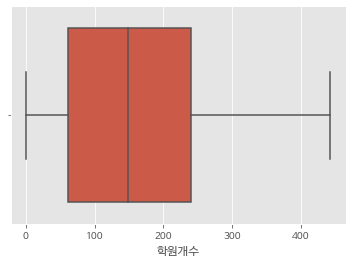

In [ ]:
sns.boxplot(data=df,x='학원개수')

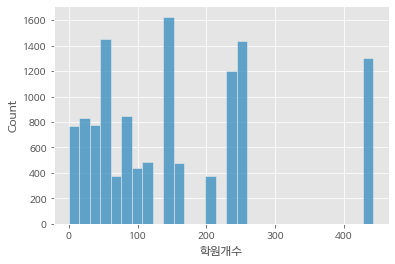

In [ ]:
sns.histplot(data=df,x='학원개수')

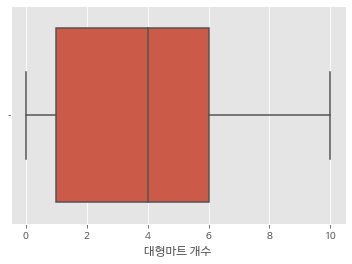

In [ ]:
sns.boxplot(data=df,x='대형마트 개수')

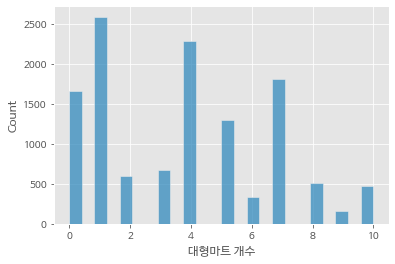

In [ ]:
sns.histplot(data=df,x='대형마트 개수')

In [ ]:
col=df.columns
col

In [ ]:
col=['학원개수', '대형마트 개수', '병원개수', '스타벅스개수', '배스킨', '써브웨이',
       '편의점개수']

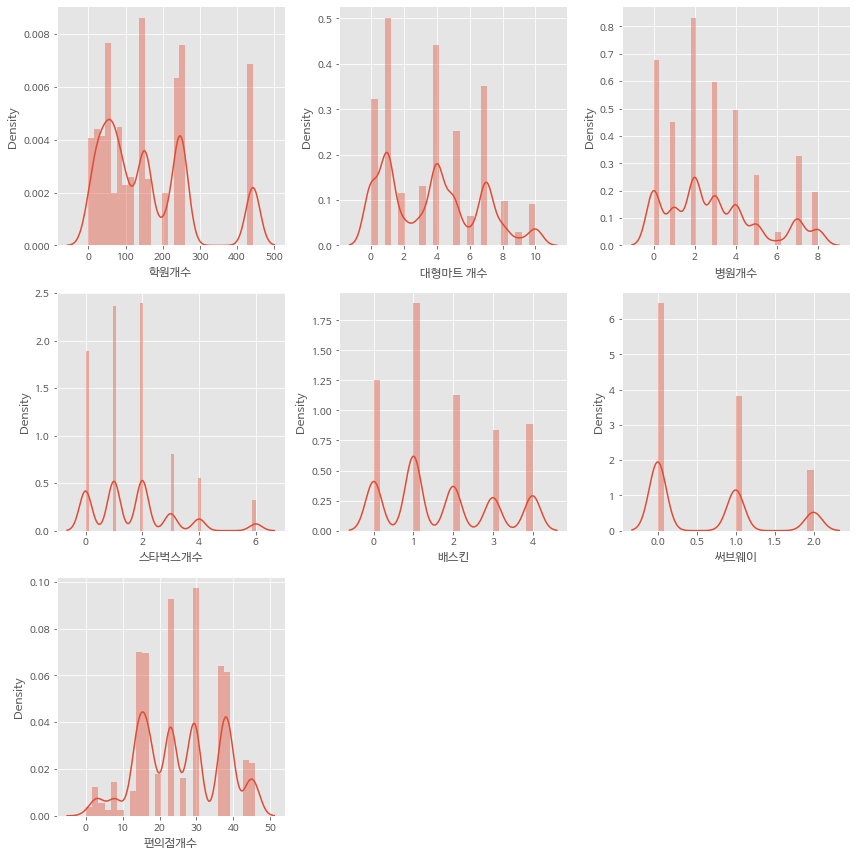

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

plt.figure(figsize=(12,12))
for i,colName in enumerate(col):
  plt.subplot(3,3,i+1)
  sns.distplot(df.loc[:,colName])
plt.tight_layout()
plt.show()

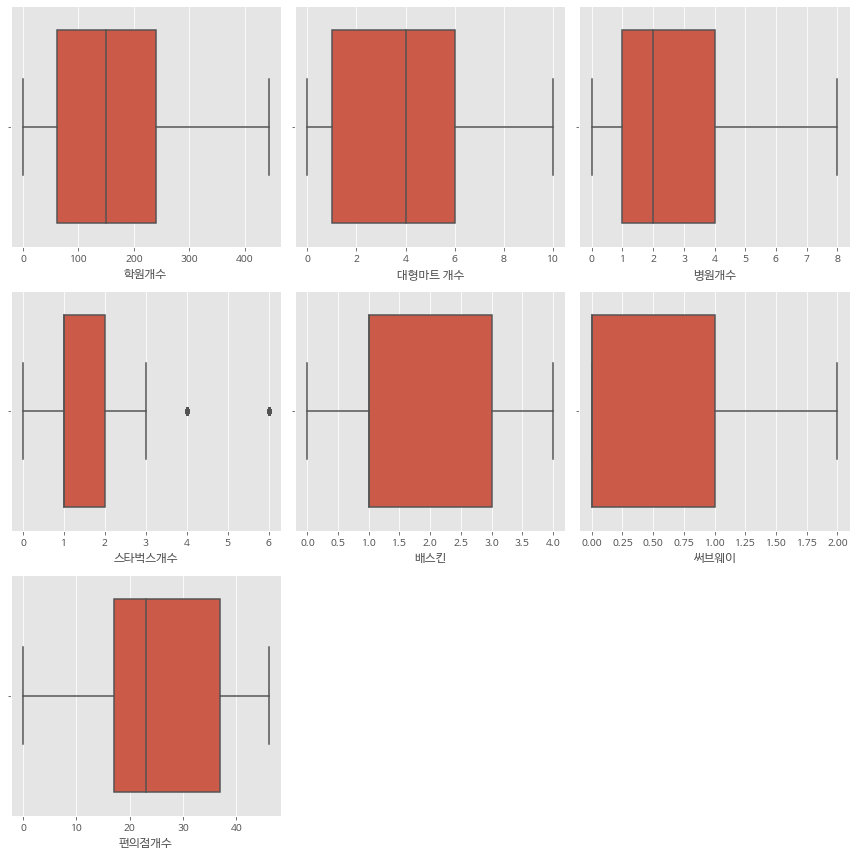

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

plt.figure(figsize=(12,12))
for i,colName in enumerate(col):
  plt.subplot(3,3,i+1)
  sns.boxplot(df.loc[:,colName])
plt.tight_layout()
plt.show()

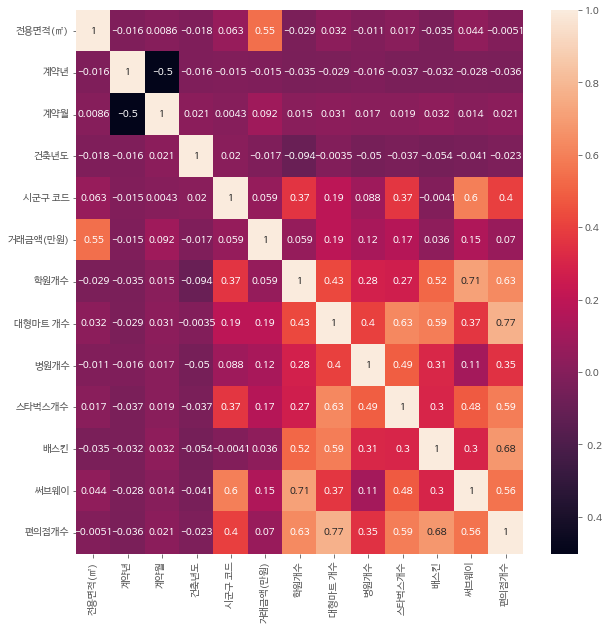

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)